<a href="https://colab.research.google.com/github/NiharikaShrivastava/Object-Detection-and-Tracking/blob/main/Object_Detection_And_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

Saved to photo.jpg

image 1/1 /content/photo.jpg: 480x640 1 person, 1 apple, 1 orange, 197.8ms
Speed: 4.4ms preprocess, 197.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


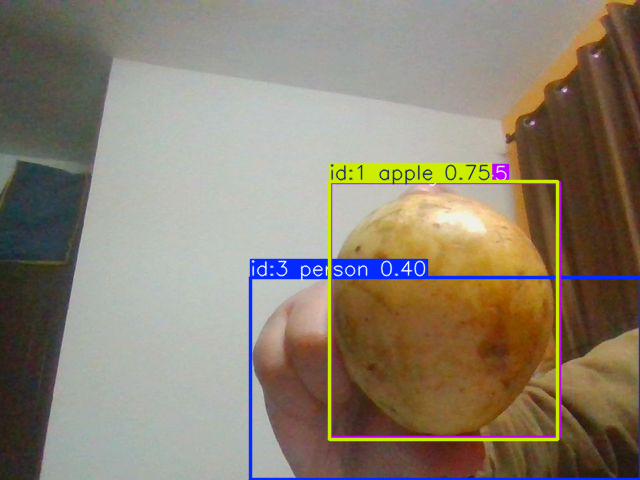

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from ultralytics import YOLO

# 1. Load the pre-trained model (Task 4: YOLO)
model = YOLO('yolov8n.pt')

# JavaScript to handle the webcam stream in Colab
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      return new Promise((resolve) => {
        capture.onclick = () => {
          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          resolve(canvas.toDataURL('image/jpeg', quality));
        };
      });
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# --- RUNNING DETECTION ---
try:
  # This will open your webcam in the browser
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Process the captured image
  # (Note: For real video tracking in Colab, we typically process frame-by-frame)
  # 3. Process frame to detect objects and draw bounding boxes
  # 4. Apply tracking using model.track
  results = model.track(filename, persist=True)

  # 5. Display the output with labels and tracking IDs
  from google.colab.patches import cv2_imshow
  annotated_frame = results[0].plot()
  cv2_imshow(annotated_frame)

except Exception as err:
  print(str(err))

In [9]:

results = model.track(source="cartoon.mp4", show=False, persist=True)


print("Video processing complete. Check the 'runs' folder to download the output!")


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/231) /content/cartoon.mp4: 384x640 1 person, 308.7ms
video 1/1 (frame 2/231) /content/cartoon.mp4: 384x640 1 person, 150.1ms
video 1/1 (frame 3/231) /content/cartoon.mp4: 384x640 1 person, 171.6ms
video 1/1 (frame 4/231) /content/cartoon.mp4: 384x640 1 person, 146.0ms
video 1/1 (frame 5/231) /content/cartoon.mp4: 384x640 1 person, 143.6ms
video 1/1 (frame 6/231) /content/cartoon.mp4: 384x640 1 person, 161.4ms
video 1/1 (frame 7/231) /c